# Plot the data
Read the file ["Readme.ipynb"](Readme.ipynb) for more information.

## Modules
Needed to use non-Python functionalities already programmed by someone else.

In [1]:
# Used to cast the polygons into np.arrays and afterwards transpose them easily with the .T function
import numpy as np
import matplotlib.pyplot as plt    # to plot the counties
# Used to determine which part of the plot should be saved
from matplotlib.transforms import Bbox
# Used to determine which part of the plot should be saved
from matplotlib.transforms import Bbox
# Used to navigate the directories and check for files
import os
# backup directory of this file, because the working directory is changed to save files
cor_mx_selected_counties_directory = os.getcwd()

## Get the Data
Read the file ["Readme.ipynb"](Readme.ipynb) or check out the files ["get_data.ipynb"](get_data.ipynb) and ["get_geographical_data_of_german_counties.ipynb"](get_geographical_data_of_german_counties.ipynb) for more information about the data collection.

In [2]:
os.chdir(".."), os.chdir("..")   # move two directories up
%run color_scheme.ipynb
os.chdir("collect_data")
%run get_data.ipynb
os.chdir(cor_mx_selected_counties_directory)    # return to original directory

Polished county data from file is ready to go!
Polished covid19 data from file is ready to go!


## percentage of counties correlations with maximum at a shift of 0

In [3]:
number_of_correlations = 0
number_of_correaltion_with_peak_at_shift_0 = 0
for county in covid19.values():
    for correlation in county["correlation"].values():
        if np.argmax(correlation) == 50:
            number_of_correaltion_with_peak_at_shift_0 += 1
        number_of_correlations += 1
print(100*number_of_correaltion_with_peak_at_shift_0/number_of_correlations)
print(100*(number_of_correaltion_with_peak_at_shift_0-len(covid19.keys()))/(
      number_of_correlations))

8.70133848619097
8.458620039589029


In [4]:
print(number_of_correlations)
print(number_of_correaltion_with_peak_at_shift_0)

169744
14770


## Function to calculate the probability of correlations between two arrays

In [5]:
selected_counties = {"6633":"6611",
"7235":"7211",
"7337":"7313",
"7340":"7317",
"8125":"8121",
"8216":"8211",
"9187":"9163",
"9274":"9261",
"9278":"9263",
"9371":"9361",
"9374":"9363",
"9375":"9362",
"9471":"9461",
#9472:,
#9473:,
#9475:,
#9571:,
#9678:,
#9679:,
#9777:,
"9780":"9763",
"12069":"12051",
"12071":"12052",
"15088":"15002",
"16071":"16055"}

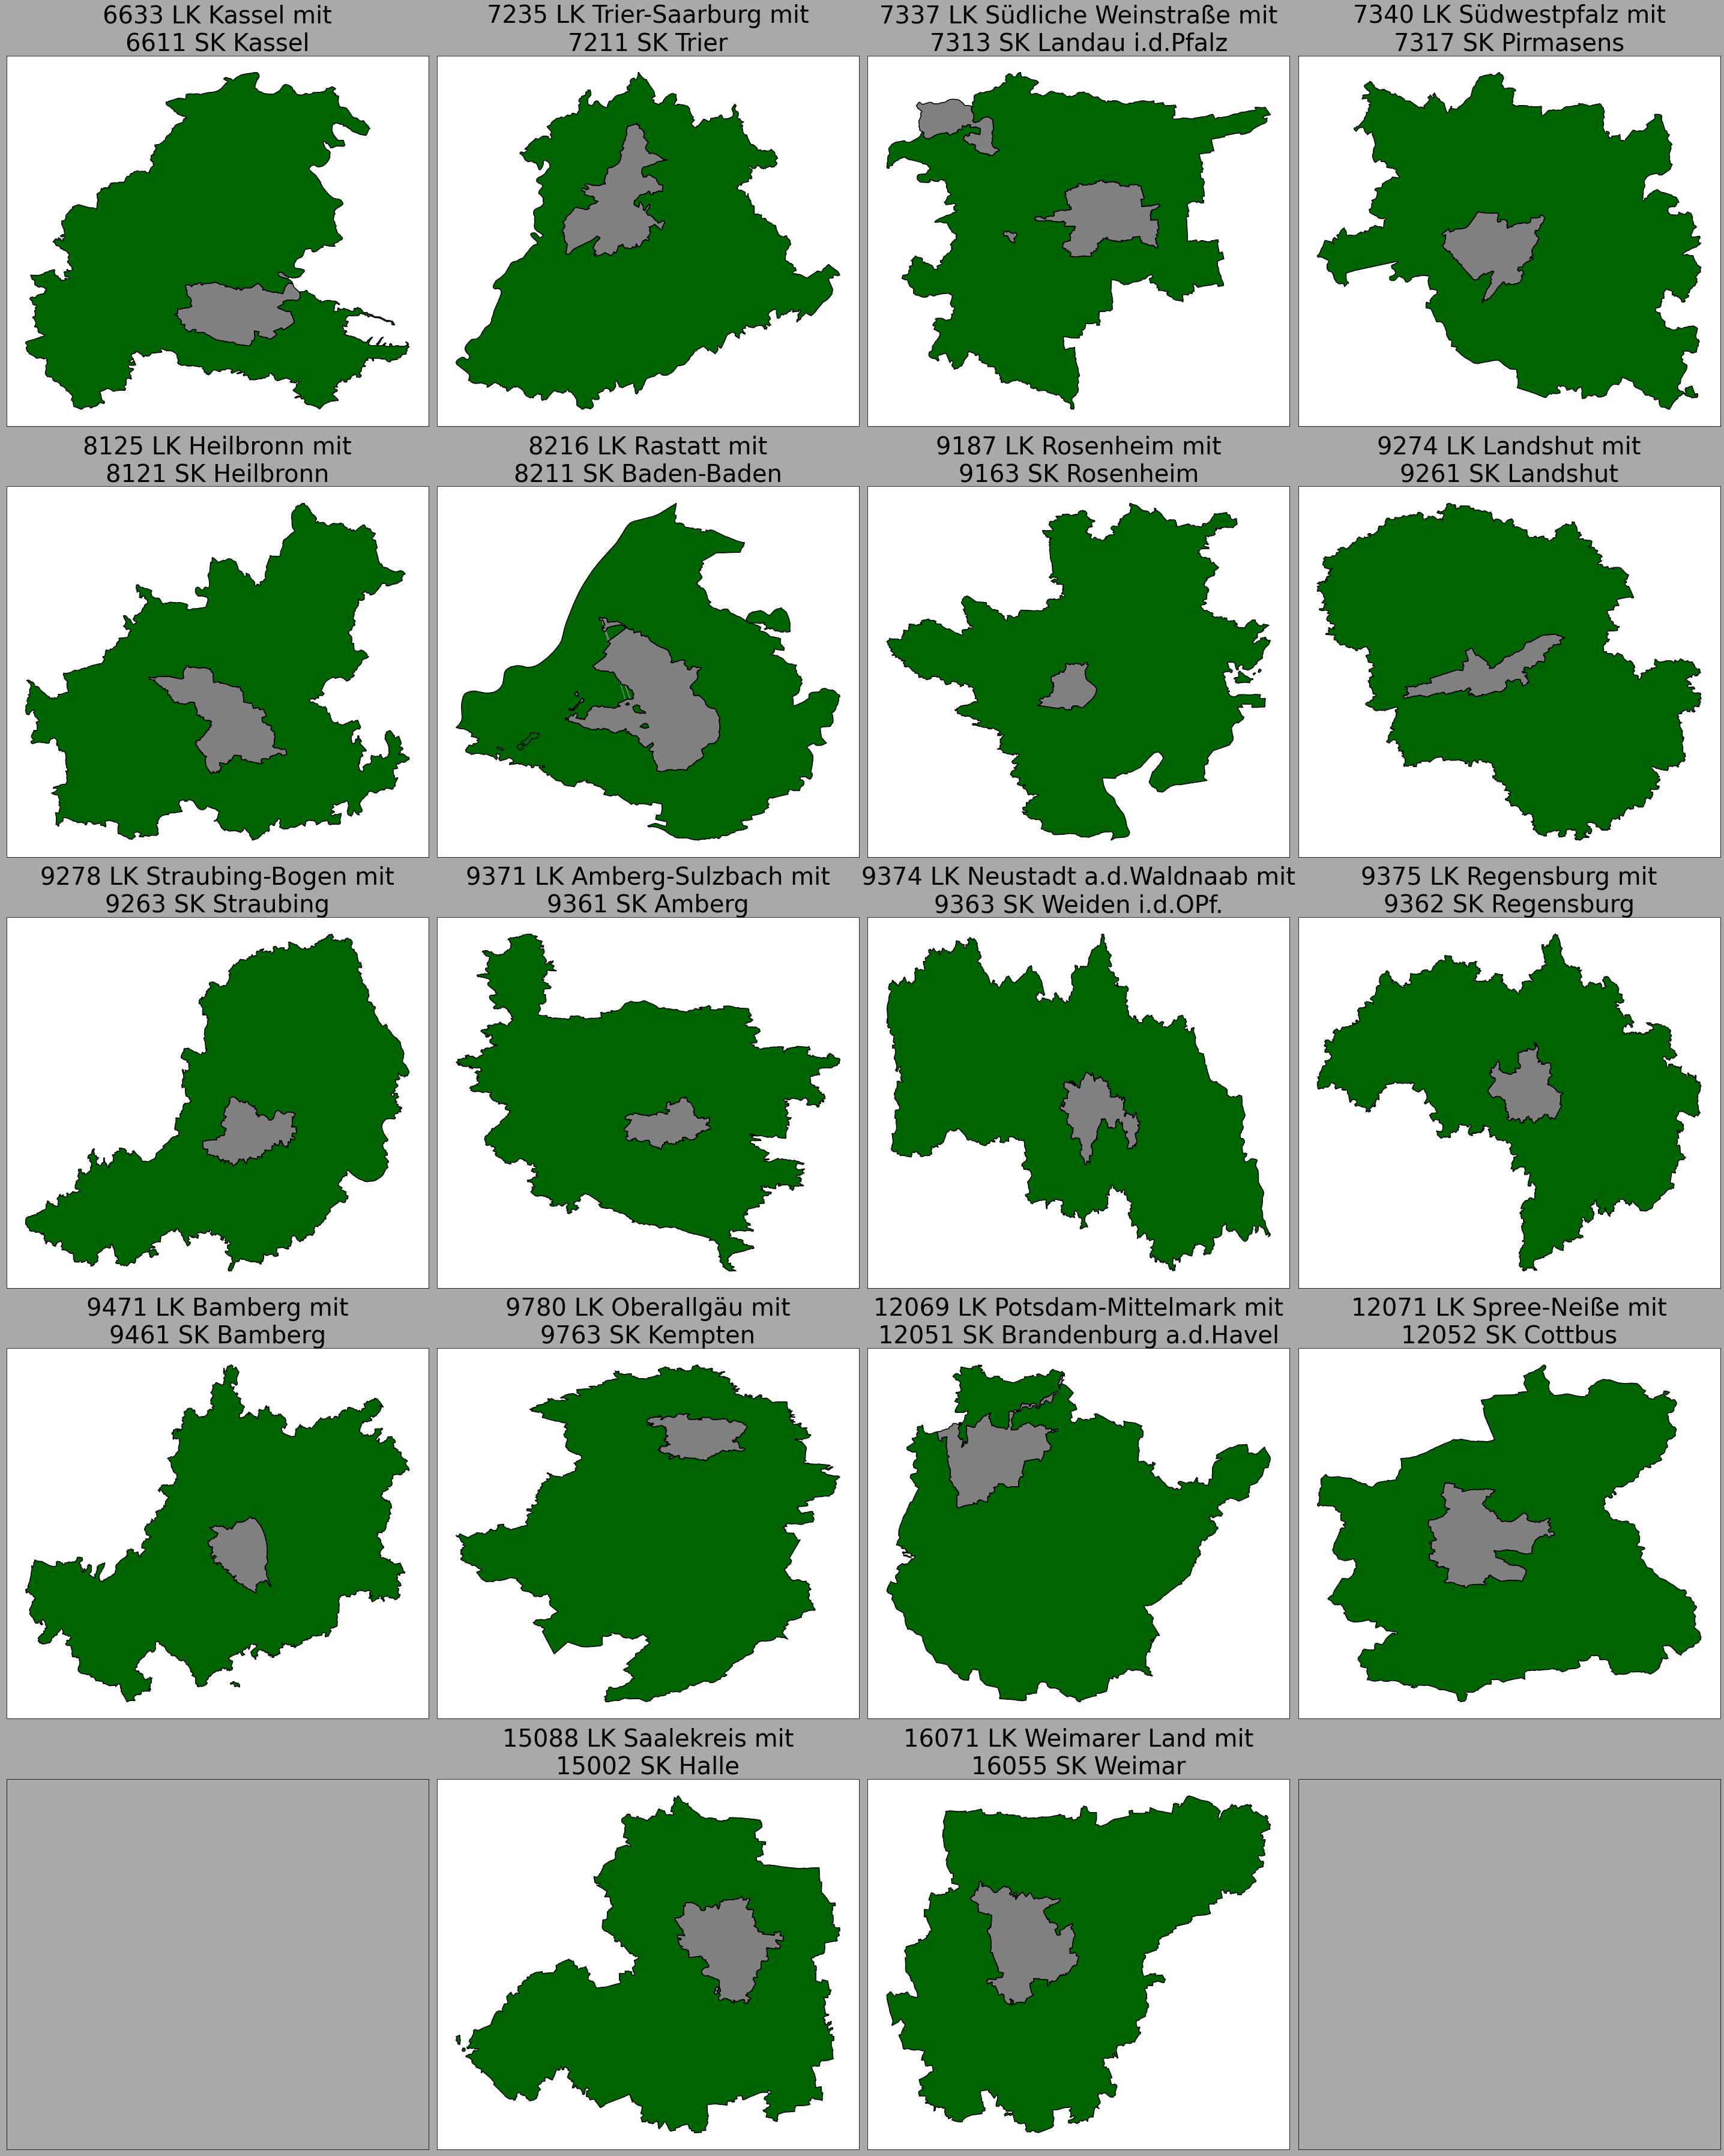

In [6]:
fig, ax = plt.subplots(5, 4, figsize = (40, 50), facecolor='darkgrey')
fig.tight_layout(h_pad=10)#, w_pad=30, rect=(0, 0, 20, 1))
plt.sca(ax[0][0])
i = 0
for county, city in selected_counties.items():
    if i == 16: i+=1
    axis = ax[i//4][i%4]
    axis.set_title("{} {} mit\n{} {}".format(
        county, counties_geography[county]['name'],
        city, counties_geography[city]['name']),
        fontsize=40)
    axis.axes.get_xaxis().set_visible(False)
    axis.axes.get_yaxis().set_visible(False)
    for polygon in counties_geography[county]['raw_geometry']:
        x, y = np.array(polygon).T
        axis.fill(x, y, color="darkgreen")
    # draw the lines around the counties
    for polygon in counties_geography[county]['raw_geometry']:
        x, y = np.array(polygon).T
        axis.plot(x, y, color="black")
    for polygon in counties_geography[city]['geometry']:
        x, y = np.array(polygon).T
        axis.fill(x, y, color="grey")
    # draw the lines around the counties
    for polygon in counties_geography[city]['raw_geometry']:
        x, y = np.array(polygon).T
        axis.plot(x, y, color="black")
    i+=1
axis = ax[4][0]
axis.axes.get_xaxis().set_visible(False)
axis.axes.get_yaxis().set_visible(False)
axis.set_facecolor("darkgrey")
axis = ax[4][3]
axis.axes.get_xaxis().set_visible(False)
axis.axes.get_yaxis().set_visible(False)
axis.set_facecolor("darkgrey")
os.chdir(".."), os.chdir(".."), os.chdir("..")    # move to correct directory
# check if the needed directory is available - otherwise create it
if not(os.path.isdir("results")): os.makedirs("results")
plt.tight_layout()
plt.savefig("results/selected_counties.png")
os.chdir(cor_mx_selected_counties_directory)    # return to original directory

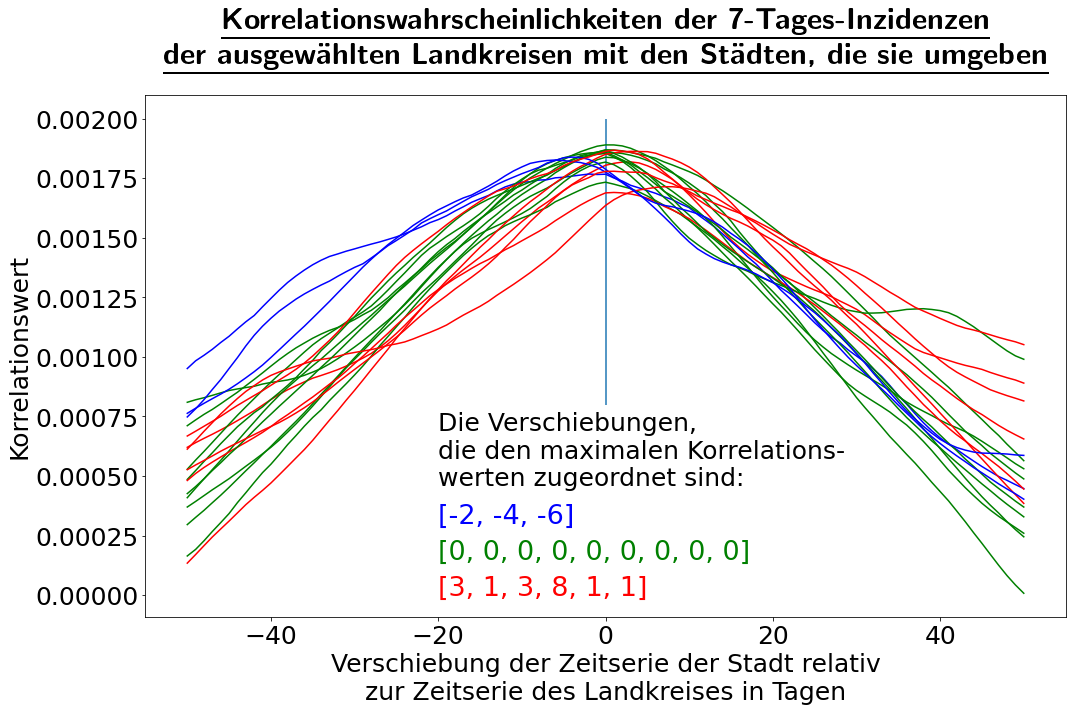

In [14]:
plt.figure(figsize=(15, 10))    # initiate and enlarge plot
city_after_county = list()
city_equal_to_county = list()
county_after_city = list()
plt.title(r"\textbf{\underline{Korrelationswahrscheinlichkeiten der 7-Tages-Inzidenzen}}"+
          "\n"+
          r"\textbf{\underline{der ausgewählten Landkreisen mit den Städten, die sie umgeben}}",
         usetex=True, fontsize=30, y=1.05)
for county, city in selected_counties.items():
    max_correlation_i = np.argmax(covid19[county]["correlation"][city])-50
    if  max_correlation_i > 0:
        colour="red"
        city_after_county.append( max_correlation_i)
    elif  max_correlation_i == 0:
        colour="green"
        city_equal_to_county.append(max_correlation_i)
    else:
        colour="blue"
        county_after_city.append(max_correlation_i)
    plt.plot([e for e in range(-50, 51)], covid19[county]["correlation"][city],
            color=colour)
plt.text(-20,0.00046, "Die Verschiebungen,\n"+
         "die den maximalen Korrelations-\n"+
         "werten zugeordnet sind:",
         #"Verschiebungen der 7-Tages-Inzidenzen\n" +
         #"der Stadtkreise relativ zu den\n" +
         #"Landkreisen mitmaximalen Korrelationswert:\n" +
         fontsize=25
        )

plt.text(-20,0.0003, county_after_city,color = "blue", fontsize=27)
plt.text(-20,0.00015, city_equal_to_county,color = "green", fontsize=27)
plt.text(-20,0, city_after_county, color = "red", fontsize=27)
plt.ylabel("Korrelationswert", fontsize=25)
plt.xticks(fontsize=25)
plt.xlabel("Verschiebung der Zeitserie der Stadt relativ\n" +
           "zur Zeitserie des Landkreises in Tagen", fontsize=25)
plt.yticks(fontsize=25)
plt.vlines([0], 0.0008, 0.002)
os.chdir(".."), os.chdir(".."), os.chdir("..")    # move to correct directory
# check if the needed directory is available - otherwise create it
if not(os.path.isdir("results")): os.makedirs("results")
plt.tight_layout()
plt.savefig("results/highest_selected_counties.png")
os.chdir(cor_mx_selected_counties_directory)    # return to original directory

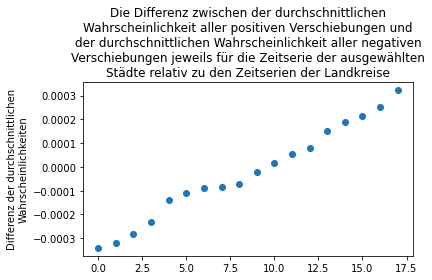

In [8]:
probabilities_average=list()
for county, city in selected_counties.items():
    probabilities_average.append(sum(covid19[county]["correlation"][city][51:])/
          len(covid19[county]["correlation"][city][51:])
          -sum(covid19[county]["correlation"][city][:50])/
         len(covid19[county]["correlation"][city][:50]))
probabilities_average.sort()
plt.ylabel("Differenz der durchschnittlichen\nWahrscheinlichkeiten")
plt.title("Die Differenz zwischen der durchschnittlichen\n"+
          "Wahrscheinlichkeit aller positiven Verschiebungen und\n"+
          "der durchschnittlichen Wahrscheinlichkeit aller negativen\n"+
          "Verschiebungen jeweils für die Zeitserie der ausgewählten\n"+
          "Städte relativ zu den Zeitserien der Landkreise")
plt.scatter([e for e in range(len(probabilities_average))],probabilities_average)
os.chdir(".."), os.chdir(".."), os.chdir("..")    # move to correct directory
# check if the needed directory is available - otherwise create it
if not(os.path.isdir("results")): os.makedirs("results")
plt.tight_layout()
plt.savefig("results/sum_selected_counties.png")
os.chdir(cor_mx_selected_counties_directory)    # return to original directory